In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
# Input data for vegetable oil properties
data = {
    "vegetable oil": ["Soyabean", "Sunflower", "Safflower", "Mustard", "Linseed", "Groundnut", "Jatropha", "Palm", "Karanj", "Mahua"],
    "palmitic acid": [13.9, 6.0, 7.3, 2.0, 5.1, 10.6, 14.9, 43.6, 11.6, 24.2],
    "stearic acid": [2.1, 5.9, 1.9, 2.0, 2.5, 1.0, 9.5, 4.5, 7.5, 25.8],
    "oleic acid": [23.2, 16.0, 13.6, 18.0, 18.9, 49.9, 40.5, 40.5, 51.6, 37.2],
    "linoleic acid": [4.3, 0.6, 0, 8.0, 55.1, 0.15, 0.3, 0.2, 0, 0],
    "linolenic acid": [56.2, 71.4, 77.2, 13.0, 18.1, 33.4, 34.7, 10.1, 16.6, 12.8],
    "eruic acid": [0, 0, 0, 45.0, 0, 0.2, 0, 0.1, 0, 0]
}

# Properties to be predicted for vegetable oil
target = {
    "vegetable oil": ["Soyabean", "Sunflower", "Safflower", "Mustard", "Linseed", "Groundnut", "Jatropha", "Palm", "Karanj", "Mahua"],
    "pour point": [-4, -4, -6, 0, -10, -8, -5, 4, -10, 4],
    "cloud point": [-0.5, -1, -4, 2, -8, 0, -3, 8, -5, 9],
    "flash point": [131, 170, 180, 173, 161, 158, 170, 182, 160, 129],
    "fire point": [152, 191, 195, 195, 180, 222, 191, 202, 178, 141],
    "viscosity": [4.3, 4.2, 4.03, 4.20, 4.20, 4.49, 4.6, 4.42, 3.9, 5.4],
    "density": [0.885, 0.88, 0.88, 0.88, 0.87, 0.87, 0.88, 0.87, 0.88, 0.90],
    "saponification": [195, 192, 189, 192, 190, 189.3, 199, 207, 188, 189],
    "iodine value": [122.0, 135.8, 140.9, 82.2, 165.0, 89.1, 102.0, 61.3, 85.0, 81.0]
}
# Extract the features and target variables
X = np.array([data["palmitic acid"], data["stearic acid"], data["oleic acid"], data["linoleic acid"], data["linolenic acid"], data["eruic acid"]]).T
y_pour_point = np.array(target["pour point"])
y_cloud_point = np.array(target["cloud point"])
y_flash_point = np.array(target["flash point"])
y_fire_point = np.array(target["fire point"])
y_viscosity = np.array(target["viscosity"])
y_density = np.array(target["density"])
y_saponification = np.array(target["saponification"])
y_iodine_value = np.array(target["iodine value"])

# Create Min-Max scaler object
scaler = MinMaxScaler()

# Normalize the input features
X_normalized = scaler.fit_transform(X)

# Normalize the target variables (if needed)
# Note: Since the target variables in this case are already small ranges, normalization may not be necessary.
# If you want to normalize them, you can use the same scaler object to normalize each target variable separately.



In [3]:
# Create a linear regression model for each property

# Pour Point
pour_point_model = LinearRegression()
pour_point_model.fit(X_normalized, y_pour_point)

# Cloud Point
cloud_point_model = LinearRegression()
cloud_point_model.fit(X_normalized, y_cloud_point)

# Flash Point
flash_point_model = LinearRegression()
flash_point_model.fit(X_normalized, y_flash_point)

# Fire Point
fire_point_model = LinearRegression()
fire_point_model.fit(X_normalized, y_fire_point)

# Viscosity
viscosity_model = LinearRegression()
viscosity_model.fit(X_normalized, y_viscosity)

# Density
density_model = LinearRegression()
density_model.fit(X_normalized, y_density)

# Saponification
saponification_model = LinearRegression()
saponification_model.fit(X_normalized, y_saponification)

# Iodine Value
iodine_value_model = LinearRegression()
iodine_value_model.fit(X_normalized, y_iodine_value)


LinearRegression()

In [4]:
from sklearn.metrics import r2_score, mean_squared_error

# Function to calculate R2 and RMSE for a given model and property
def evaluate_model(model, X, y_true):
    y_pred = model.predict(X)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, rmse

# Function to print predictions for a given model and property
def print_predictions(model, X):
    y_pred = model.predict(X)
    return y_pred

# Test data (replace this with the test data you want to use)
X_test = X_normalized  # You should normalize your test data using the same scaler

# Evaluate and print predictions for each property
properties = ["Pour Point", "Cloud Point", "Flash Point", "Fire Point", "Viscosity", "Density", "Saponification", "Iodine Value"]
models = [pour_point_model, cloud_point_model, flash_point_model, fire_point_model, viscosity_model, density_model, saponification_model, iodine_value_model]

for property_name, model in zip(properties, models):
    r2, rmse = evaluate_model(model, X_test, target[property_name.lower()])
    predictions = print_predictions(model, X_test)
    print(f"Property: {property_name}")
    print(f"R-squared (R2): {r2:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("Predicted Values:", predictions)
    print("\n")


Property: Pour Point
R-squared (R2): 0.9783
Root Mean Squared Error (RMSE): 0.7170
Predicted Values: [-4.32133356e+00 -4.90000728e+00 -5.15017558e+00  4.66354678e-03
 -9.97075661e+00 -9.03766525e+00 -3.55525814e+00  3.97673445e+00
 -9.61186090e+00  3.56565933e+00]


Property: Cloud Point
R-squared (R2): 0.8668
Root Mean Squared Error (RMSE): 1.8737
Predicted Values: [-1.23464337 -2.34269104 -2.79471049  2.01376269 -7.94481343 -3.12411131
  1.23771205  8.05501301 -3.8556143   7.4900962 ]


Property: Flash Point
R-squared (R2): 0.3455
Root Mean Squared Error (RMSE): 14.1065
Predicted Values: [167.48820545 160.70862891 167.31487761 172.99133245 158.35215041
 163.84721146 154.4103839  174.20597517 157.83147819 136.84975645]


Property: Fire Point
R-squared (R2): 0.6093
Root Mean Squared Error (RMSE): 14.0157
Predicted Values: [190.59462101 176.38237685 184.03003874 195.05033118 177.18580439
 214.90268513 191.762365   193.54560066 180.53654087 143.00963618]


Property: Viscosity
R-squared (

In [5]:
# Function to print the intercept and weights for a given model
def print_coefficients(model, feature_names):
    intercept = model.intercept_
    weights = model.coef_

    print("Intercept:", intercept)
    print("Weights:")
    for feature_name, weight in zip(feature_names, weights):
        print(f"{feature_name}: {weight}")
    print("\n")

# Feature names
feature_names = ["Palmitic Acid", "Stearic Acid", "Oleic Acid", "Linoleic Acid", "Linolenic Acid", "Eruic Acid"]

# Print coefficients for each property's model
for property_name, model in zip(properties, models):
    print(f"Property: {property_name}")
    print_coefficients(model, feature_names)


Property: Pour Point
Intercept: -27.56118324633158
Weights:
Palmitic Acid: 24.617630145870194
Stearic Acid: 12.8340811152323
Oleic Acid: 7.082537443583209
Linoleic Acid: 11.749368576608557
Linolenic Acid: 18.80887395974931
Eruic Acid: 23.709460652155702


Property: Cloud Point
Intercept: -26.87460291342435
Weights:
Palmitic Acid: 24.52569436288973
Stearic Acid: 13.023467032303676
Oleic Acid: 11.9616479268627
Linoleic Acid: 12.204070195254271
Linolenic Acid: 20.4825988158672
Eruic Acid: 24.32103807108429


Property: Flash Point
Intercept: 192.36911759499776
Weights:
Palmitic Acid: 3.416135449650304
Stearic Acid: -42.85584624553131
Oleic Acid: -21.775083566388616
Linoleic Acid: -25.788838536049013
Linolenic Acid: -23.93421629210762
Eruic Acid: -10.34969067512191


Property: Fire Point
Intercept: 13.485825767037966
Weights:
Palmitic Acid: 85.78732206809187
Stearic Acid: -5.405070025188635
Oleic Acid: 133.1893720121793
Linoleic Acid: 120.0042402863166
Linolenic Acid: 159.81072992421218
Eru

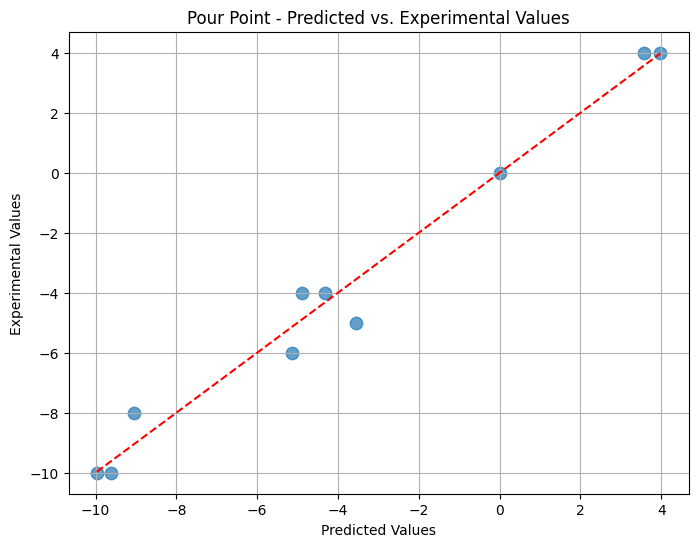

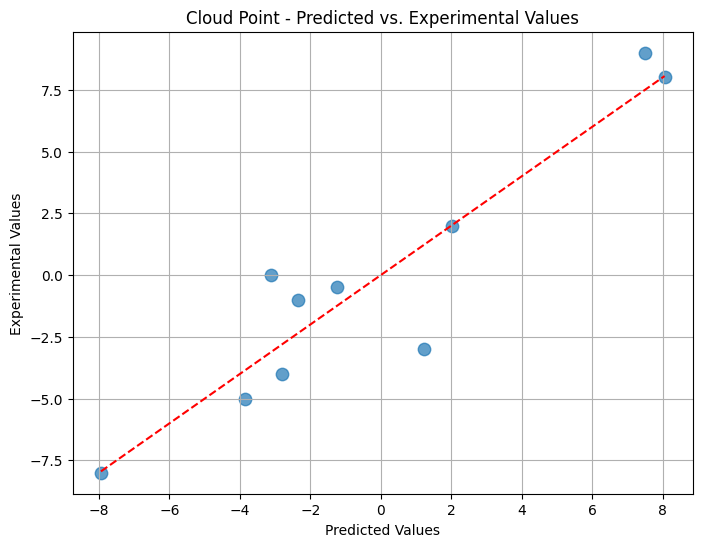

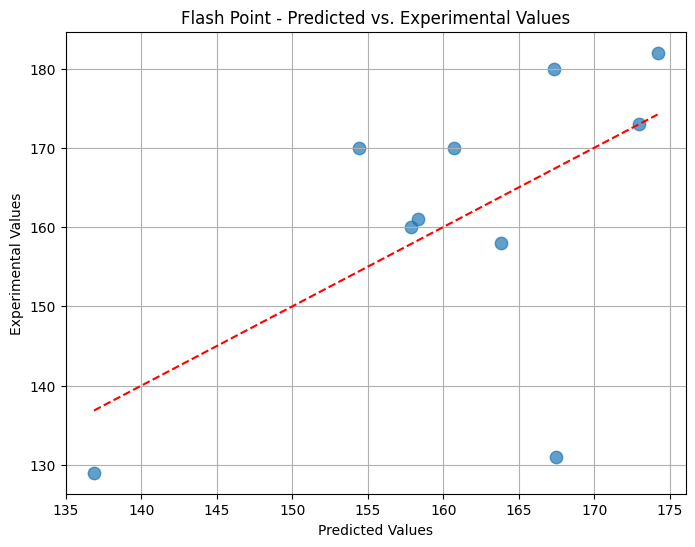

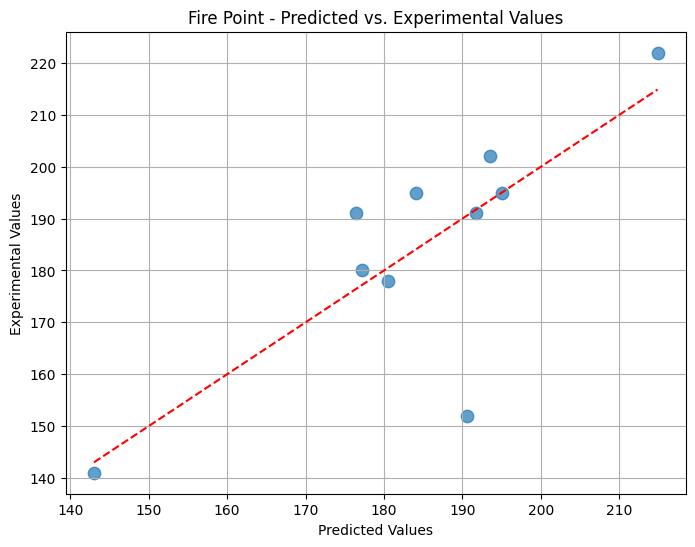

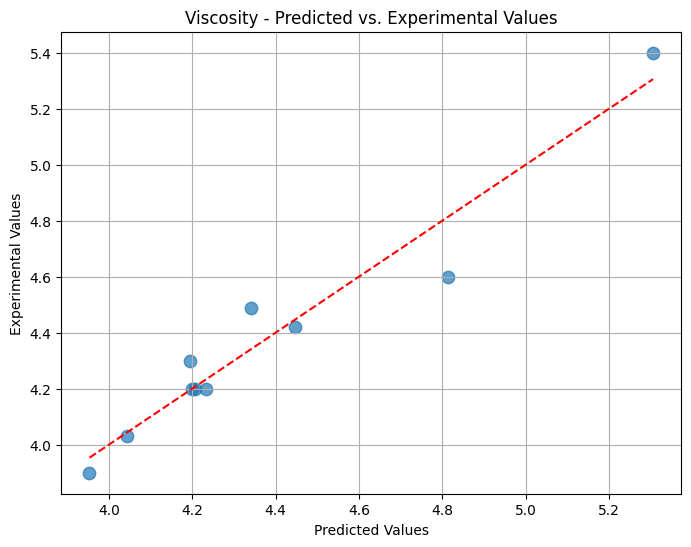

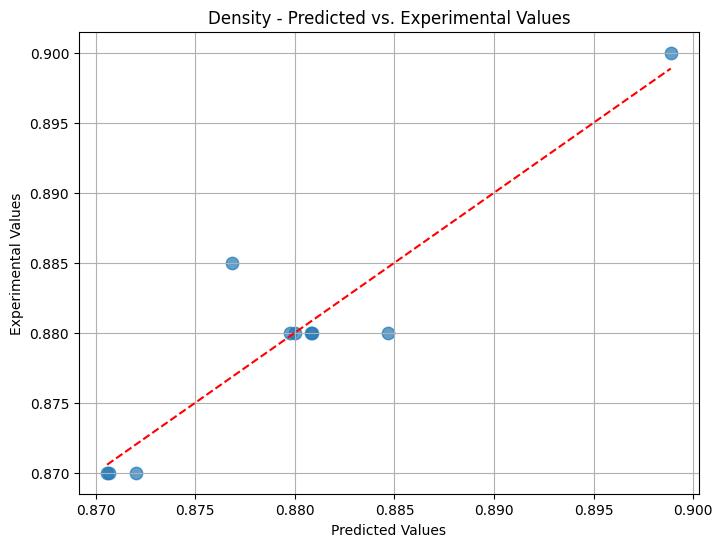

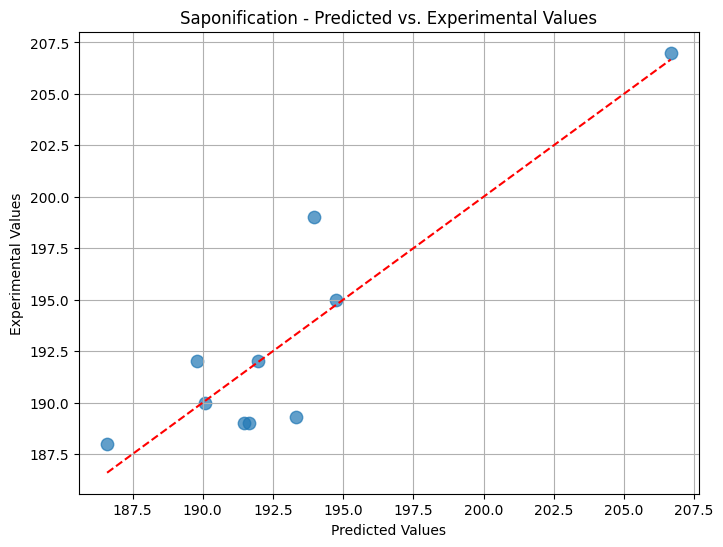

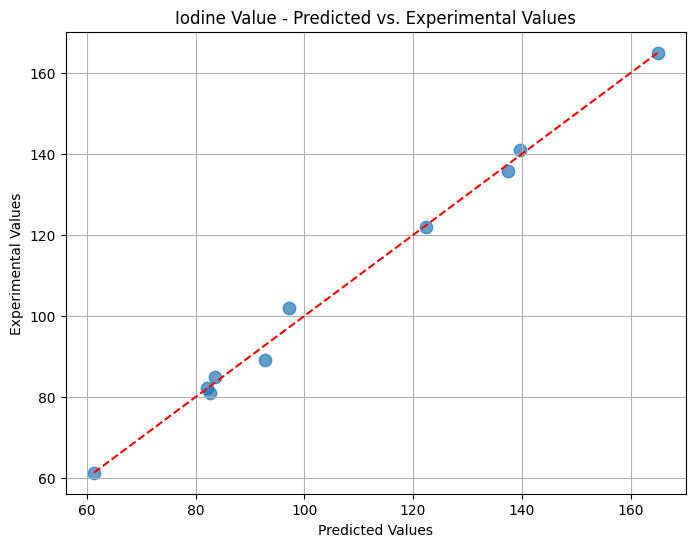

In [6]:
import matplotlib.pyplot as plt

# Function to plot the predicted vs. experimental values for a given property
def plot_predictions_vs_actual(property_name, y_pred, y_true):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, y_true, s=80, alpha=0.7)
    plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], 'r--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Experimental Values")
    plt.title(f"{property_name} - Predicted vs. Experimental Values")
    plt.grid(True)
    plt.show()

# Plot for each property's model
for property_name, model in zip(properties, models):
    y_pred = model.predict(X_test)
    y_true = target[property_name.lower()]
    plot_predictions_vs_actual(property_name, y_pred, y_true)



